<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/Best_Model_datasets_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 베스트 모델 만들기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
# seed 고정
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 확인과 실행

In [4]:
# 데이터 불러오기
# sample() : 원본 데이터에서 정해진 비율만큼 랜덤으로 가져온다.
df_pre = pd.read_csv("/content/gdrive/MyDrive/Study/Everyone's DeepLearning/dataset/wine.csv", header=None)
df = df_pre.sample(frac=1)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
4695,6.8,0.130,0.39,1.4,0.034,19.0,102.0,0.99121,3.23,0.60,11.30,7,0
6377,5.8,0.315,0.19,19.4,0.031,28.0,106.0,0.99704,2.97,0.40,10.55,6,0
4605,6.2,0.160,0.32,1.1,0.036,74.0,184.0,0.99096,3.22,0.41,11.00,6,0
3098,6.7,0.510,0.24,2.1,0.043,14.0,155.0,0.99040,3.22,0.60,13.00,6,0
2859,6.4,0.230,0.30,7.1,0.037,63.0,236.0,0.99520,3.06,0.34,9.20,6,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 4695 to 1351
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


- 0 : 주석산 농도
- 1 : 아세트산 농도
- 2 : 구연산 농도
- 3 : 잔류 당분 농도
- 4 : 염화나트륨 농도
- 5 : 유리 아황산 농도
- 6 : 총 아황산 농도
- 7 : 밀도
- 8 : pH
- 9 : 황산칼륨 농도
- 10 : 알코올 도수
- 11 : 와인의 맛(0 ~ 10등급)
- 12 : class('1':레드와인, '0':화이트와인)

In [7]:
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]

In [9]:
# 모델 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, epochs=200, batch_size=200)

In [13]:
model.evaluate(X, Y)[1]

204/204 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9871


0.9870709776878357

## 모델 업데이트하기


In [14]:
# 모델 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
import os

model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [20]:
# 모델 저장 조건 설정
model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=1, callbacks=[checkpointer])

## 그래프로 확인하기

In [22]:
df = df_pre.sample(frac=0.15)

In [23]:
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]

In [24]:
# 모델 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# 모델 저장 폴더 설정
model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [28]:
# 모델 저장 조건 설정
model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

In [33]:
# 오차값 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 정확도 저장
y_acc = history.history['accuracy']

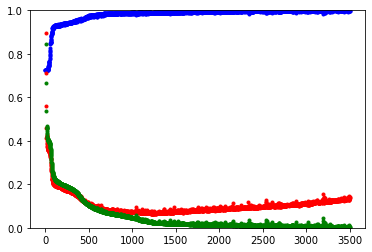

In [35]:
# 그래프 그리기
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_loss, 'o', c='green', markersize=3)
plt.ylim([0, 1])
plt.show()

## 학습 자동 중단

In [36]:
# 모델 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# EarlyStopping 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

## 모델 조기 종료와 모델 저장 동시 사용

In [39]:
# 모델 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# 모델 저장 폴더 설정
model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [43]:
# ModelCheckpoint 설정
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

# EarlyStopping 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer])